In [11]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, romberg, trapezoid, romberg
from typing import Callable
from scipy.special import roots_legendre

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Edwar Isaías Pacheco Rojas
### CC: 1017240283
*Métodos computacionales 2024-II*

---

#1
* Implemente una función para el **método de integración de Romberg** definiendo un límite de tolerancia de 1e-8 y/o un máximo de iteraciones de 10.

* Encuentre la integral para

$$\int_0^{\pi/4} e^{3x}\cdot \sin(x)dx$$

* Imprima su resultado y compare los valores dados por `scipy.integrate.romberg`

* Finalmente, encuentre el valor del error, hallando el valor exacto usando `sympy`



In [2]:
# @title Función de integración por Romberg
def integral_romberg(f: Callable[[float], float], a:float, b:float, h: float,
                     tol: float = 1e-8, max_iter: int = 10) -> float:

  """
  La función calcula la integral de una función f en el intervalo [a, b]
  utilizando el método de integración de Romberg.

  Args:
    :f: Función a integrar.
    :a: Límite inferior del intervalo.
    :b: Límite superior del intervalo.
    :tol: Tolerancia de error.
    :max_iter: Número máximo de iteraciones.

  Returns:
    :float: valor de aproximación de la integral.
  """

  def integral_trapecio(f: Callable[[float], float], a:float, b:float,
                        h: float) -> float:

    """
    Aproximación de la integral de f en [a, b] por el método trapezoidal.

    Args:
      :f: Función a integrar
      :a: Límite inferior del intervalo
      :b: Límite superior del intervalo
      :h: Distancia entre los puntos de evaluación

    Returns:
      :float: valor de aproximación de la integral
    """

    n = int((b - a) / h)
    integral = f(a) + f(b)
    for i in range(1, n):
      x_i = a + i * h
      integral += 2 * f(x_i)

    return (h / 2) * integral


  # Cálculos para la tabla de Romberg
  R = np.zeros((max_iter, max_iter))
  R[0, 0] = integral_trapecio(f, a, b, h)
  for k in range(1, max_iter):
    R[k, 0] = integral_trapecio(f, a, b, h / 2)

  ## Extrapolación
  for j in range(1, max_iter):
    for k in range(j, max_iter):
      R[k, j] = R[k, j - 1] + (R[k, j - 1] - R[k - 1, j - 1]) / (4**j - 1)

  return R[-1, -1]

In [24]:
# @title Aproximación de la función por el método de Romberg
g = lambda x: np.exp(3*x)*np.sin(x)
approx = integral_romberg(g, 0, np.pi / 4, 0.5, max_iter=20)
print(f'El valor aproximado de la integral corresponde a: {approx}')

El valor aproximado de la integral corresponde a: 1.6006586629754902


In [21]:
# @title Valor de la integral por scipy.integrate.romberg
integral = romberg(g, 0, np.pi/4)
integral

<ipython-input-21-7cf13983ccd5>:2: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  integral = romberg(g, 0, np.pi/4)


1.592097707858613

In [20]:
# @title Valor "exacto" por sympy
s = sp.symbols('s')
exp = sp.exp(3*s)*sp.sin(s)
I = sp.integrate(exp, (s, 0, sp.pi/4))
print('El valor exacto de la integral corresponde a: ')
display(I)
print(f'Dicho valor es aproximadamente: {I.evalf()}')

El valor exacto de la integral corresponde a: 


1/10 + sqrt(2)*exp(3*pi/4)/10

Dicho valor es aproximadamente: 1.59209770785868


In [28]:
# @title Errores absolutos
error_1 = abs(approx - integral)
error_2 = abs(approx - I.evalf())
print(f'El error de nuestra estimación respecto a scipy.integrate.romberg es: \
{error_1:.3f}')
print(f'El error de nuestra estimación respecto a sp.integrate es: \
{error_2:.3f}')

El error de nuestra estimación respecto a scipy.integrate.romberg es: 0.009
El error de nuestra estimación respecto a sp.integrate es: 0.009


#2

* Usando los *métodos trapezoidal compuesto*, *simpson 1/3* y de *medio punto* encuentre la siguiente integral,

$$\int_e^{1+e} dx\, \frac{1}{x\ln x}$$

* Luego, haga un estudio de la convergencia en términos del valor de $h$ o de los sub-intervalos de la función. ¿Cuál es mejor?


In [ ]:
# @title Valor "exacto" de la integral
x = sp.symbols('x')
f = 1 / (x * sp.log(x))
F = sp.integrate(f, (x, sp.E, 1 + sp.E))
integral_approx = F.evalf()
print(integral_approx)

0.272513880502583


In [ ]:
# @title Funciones de integración numérica
def integral_riemman(f: Callable[[float], float], a:float, b:float
                     , n: int) -> float:

  """
  Aproximación de la intral de f.

  Args:
    :f: Función a integrar
    :a: Índice inferior de la integral
    :b: Índice superior de la integral
    :n: Número de subintervalos

  Returns:
    float
  """

  h = (b - a) / n
  integral = 0
  for i in range(n):
    x_i = a + i * h
    integral += f(x_i + h / 2)

  return integral * h


def integral_simpson13(f: Callable[[float], float], a:float, b:float
                     , n: int) -> float:

  """
  Aproximación de la integral definida de f entre [a, b].

  Args:
    :f: Función a integrar
    :a: Límite inferior del intervalo
    :b: Límite superior del intervalo
    :n: Factor de división del intervalo

  Returns:
    :float: valor de aproximación de la integral
  """

  if n % 2 != 0:
    raise ValueError("El número de intervalos debe ser par.")

  h = (b - a) / n
  integral = f(a) + f(b)
  # Términos impares
  for i in range(1, n, 2):
    x_i = a + i * h
    integral += 4 * f(x_i)
  # Términos pares
  for j in range(2, n, 2):
    x_i = a + j * h
    integral += 2 * f(x_i)

  return integral * (h / 3)


def integral_trapecio(f: Callable[[float], float], a:float, b:float
                     , n: int) -> float:

  """
    Aproximación de la integral de f en [a, b] por el método trapezoidal.

  Args:
    :f: Función a integrar
    :a: Límite inferior del intervalo
    :b: Límite superior del intervalo
    :n: Número de subintervalos

  Returns:
    :float: valor de aproximación de la integral
  """

  h = (b - a) / n
  integral = f(a) + f(b)
  for i in range(1, n):
    x_i = a + i * h
    integral += 2 * f(x_i)

  return (h / 2) * integral

In [ ]:
# @title Función cálculo de errores en la convergencia
def convergencia(metodo, f, a, b, f_exact, eps=1e-8):

  """
  La función calcula la convergencia de un método de integración numérica.

  Args:
    :metodo: Método de integración numérica a utilizar.
    :f: Función a integrar.
    :a: Límite inferior del intervalo.
    :b: Límite superior del intervalo.
    :f_exact: Valor exacto de la integral.
    :eps: Tolerancia de error.

  Returns:
    :n: Número de subintervalos.
    :errores: Arreglo de errores.

  Observación: se emplean dos índices n y m para controlar la paridad de los
  subintervalos seg´´un el método de integración.
  """

  errores = []
  n = 1
  m = 1

  while True:
    if metodo == integral_simpson13:
      m = 2 * n
    else:
      m = n

    integral_approx = metodo(f, a, b, m)
    error = abs(integral_approx - f_exact)
    errores.append(error)

    if error < eps:
      break

    n += 1

  return n, np.array(errores)

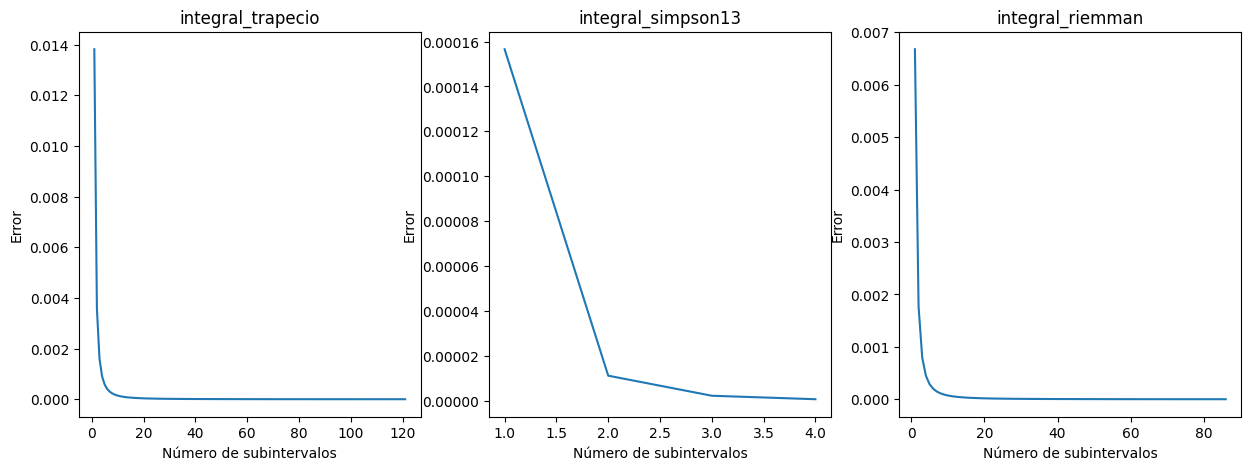

<Figure size 640x480 with 0 Axes>

In [ ]:
# @title Gráficos de error
funtion = sp.lambdify(x, f, 'numpy')
a, b = np.e, 1 + np.e

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
metodos = [integral_trapecio, integral_simpson13, integral_riemman]
for i, metodo in enumerate(metodos):
  n, errores = convergencia(metodo, funtion, a, b, integral_approx, eps=1e-6)
  ax[i].set_title(metodo.__name__)
  ax[i].set_xlabel('Número de subintervalos')
  ax[i].set_ylabel('Error')
  ax[i].plot(np.arange(1, n + 1), errores, label=metodo.__name__)

plt.show()
plt.tight_layout()

Nótese que la integral numérica por el método de Simpson 1/3 es muchísimo más precisa que los demás.

#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [ ]:
# @title Función gauss_quad_standard modificada
def gauss_quad_standard_modif(func: Callable[[float], float], a: float, b: float,
                        n: int) -> float:

  """
  Calcula la integral de una función en el intervalo [a, b] utilizando
  cuadratura gaussiana.

  Parameters:
  - func: La función a integrar.
  - a: Límite inferior del intervalo.
  - b: Límite superior del intervalo.
  - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

  Returns:
  - Aproximación de la integral.
  """

  # Obtener raíces y pesos del polinomio de Legendre
  x, w = roots_legendre(n)

  # Evaluar la suma ponderada
  integral = ((b - a) / 2) * np.sum(w * func(((b - a) / 2) * x + ((b + a) / 2)))

  return integral

In [ ]:
# @title Aproximación de la integral en 2) por gauss_quad_standard_modif
convergencia(gauss_quad_standard_modif, funtion, a, b, integral_approx,
             eps=1e-16)

(9,
 array([0.00667528807430556, 0.000103007845683956, 1.43571277300136e-6,
        1.93212537635823e-8, 2.56198118275819e-10, 3.37357919377723e-12,
        4.42423875313125e-14, 5.55111512312578e-16, 5.55111512312578e-17],
       dtype=object))

El método de gauss es excesivamente preciso para calcular el valor de una integral definida. Con solo nueve (9) raíces y pesos es posible obtener un error menor a 1e-16.

#4

Encuentra todas las raices para los polinomios de grado 3 y 4 de **Legendre** usando el Método de la Secante y Newton-Raphson.



```python
import sympy as sp
x = sp.Symbol('x')

# Polinomio de Legendre de grado n
Pn = sp.legendre(n, x)

```

y calcule los pesos $w_i$ de la cuadratura mediante la fórmula:
   $$
   w_i = \frac{2}{(1 - x_i^2) \left[P_n'(x_i)\right]^2},
   $$
   donde $P_n'(x)$ es la derivada del polinomio de Legendre $P_n(x)$.


In [ ]:
# @title Polinomios de Legendre de grado tres y cuatro
P_3 = sp.legendre(3, x)
P_4 = sp.legendre(4, x)
display(P_3, P_4)

5*x**3/2 - 3*x/2

35*x**4/8 - 15*x**2/4 + 3/8

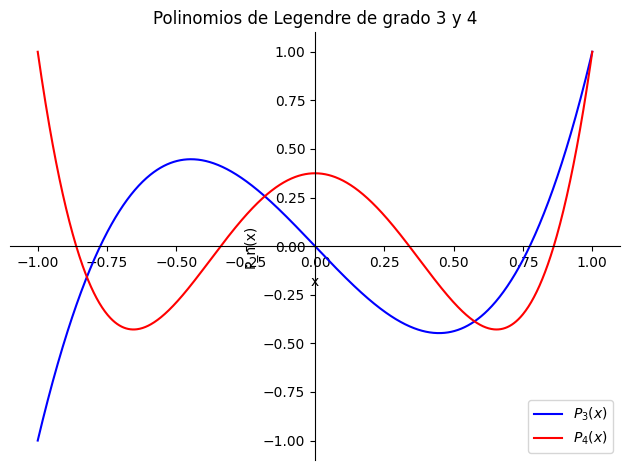

In [ ]:
# @title Gráficas de los polinomios P_3 y P_4
# Crear el gráfico sin mostrarlo inmediatamente
p = sp.plot(P_3, P_4, (x, -1, 1), show=False)

# Personalización del gráfico
p.title = "Polinomios de Legendre de grado 3 y 4"
p.xlabel = "x"
p.ylabel = "P_n(x)"
p.legend = True

p[0].label = "$P_3(x)$"
p[0].line_color = "blue"
p[0].line_style = "-."
p[0].line_width = 2

p[1].label = "$P_4(x)$"
p[1].line_color = "red"
p[1].line_style = "--"
p[1].line_width = 2

p.show()

In [ ]:
# @title Métodos de la secante y Newton-Raphson para hallar las raíces buscadas
def secante(f: Callable[[float], float], x0: float, x1:float, tol: float =1e-12,
            max_iter: int = 100) -> tuple:

  """
  Implementación del método de la secante para hallar raíces.

  Parámetros:
    f: función a la que se le desea encontrar la raíz.
    x0, x1: valores iniciales de las aproximaciones.
    tol: tolerancia, criterio de parada.
    max_iter: número máximo de iteraciones permitidas.

  Retorna:
    La aproximación a la raíz y número de iteraciones realizadas.
  """

  for i in range(max_iter):
    if f(x1) == f(x0):
      raise ValueError("No se cumplen el primer criterio para el método de la \
                       secante")

    x2 = x1 - ((f(x1) * (x1 - x0)) / (f(x1) - f(x0)))

    if abs(x2 - x1) < tol:
      return x2, i + 1  # Aproximación de la raíz y el número de iteraciones

    x1, x0 = x2, x1

  raise RuntimeError("El método no converge en un máximo de iteraciones.")


def newton_raphson(f: Callable[[float], float], df:  Callable[[float], float],
                   x0: float, tol: float = 1e-10, max_iter: int = 100) -> tuple:

  """
  Implementación del método de Newton-Raphson para hallar raíces.

  Parámetros:
    f: función a la que se le desea encontrar la raíz.
    df: derivada de la función.
    x0: valor inicial de la aproximación.
    tol: tolerancia, criterio de parada.
    max_iter: número máximo de iteraciones permitidas.

  Retorna:
    La aproximación a la raíz y el número de iteraciones realizadas.
  """

  xn = x0
  iteraciones = np.arange(max_iter)

  iter = 0
  while iter < max_iter:
    xn1 = xn - (f(xn) / df(xn))

    if df(xn) == 0:
      raise ValueError(f"La derivada de la función es cero en {xn}. ¡Error!")

    if abs(xn1 - xn) < tol:
      return xn1, iteraciones[:iter]

    xn = xn1
    iter += 1

  raise ValueError("El método no convergió en el número máximo de iteraciones.")

In [ ]:
# @title Obtención de los pesos w_i
def pesos_w(df_Pn: Callable[[float], float], xi: float) -> np.ndarray:

  """
  La función returna pesos wi para cada raíz xi de los polinomios de Legendre.

  Args:
    :df_Pn: Derivada del polinomio de Legendre de grado n.
    :xi: Raíz del polinomio de Legendre.

  Returns:
    :np.ndarray: Arreglo de pesos.
  """

  return (2 / ((1 - xi ** 2) * (df_Pn(xi) ** 2)))

In [ ]:
# @title Funciones tipo lambda de los polinomios de Legendre
## Derivada y funciones
df_P_3 = sp.lambdify(x, P_3.diff(x), 'numpy')
f_P_3 = sp.lambdify(x, P_3, 'numpy')

df_P_4 = sp.lambdify(x, P_4.diff(x), 'numpy')
f_P_4 = sp.lambdify(x, P_4, 'numpy')

Nótese que las tres raíces de $P_3(x)$ para el método de la secante se encuentran entre $(-1, -0.75),\ (-0.5, 0.5)\ y\ (0.75, 1)$.

Para $P_4(x)$ los intervalos son $(-1, -0.75),\ (-0.5, -0.25),\ (0.25, 0.5)\ y\ (0.75, 1).$

In [ ]:
# @title Raíces x_i y pesos w_i por el método de la secante para P_3
intervalos = [[-1, -0.75], [-0.5, 0.5], [0.75, 1]]
raices = []
for intervalo in intervalos:
  raiz, _ = secante(f_P_3, *intervalo)
  raices.append(raiz)

pesos = pesos_w(df_P_3, np.array(raices))
print(f'Raíces: {raices}\nPesos: {pesos}')

Raíces: [-0.7745966692414834, 0.0, 0.7745966692414834]
Pesos: [0.55555556 0.88888889 0.55555556]


In [ ]:
# @title Raíces x_i y pesos w_i por el método de la secante para P_4
intervalos = [[-1, -0.75], [-0.5, -0.25], [0.25, 0.5], [0.75, 1]]
raices = []
for intervalo in intervalos:
  raiz, _ = secante(f_P_4, *intervalo)
  raices.append(raiz)

pesos = pesos_w(df_P_4, np.array(raices))
print(f'Raíces: {raices}\nPesos: {pesos}')

Raíces: [-0.8611363115940526, -0.3399810435848563, 0.33998104358485626, 0.8611363115940526]
Pesos: [0.34785485 0.65214515 0.65214515 0.34785485]


A partir del gráfico de $P_4(x)$ podemos observar que las estimaciones iniciales para las raíces con el método de Newton-Raphson son: $x_1=-0.8, x_2=-0.3, x_3=0.3, x_4=0.8$.

Para $P_3(x)$, estas estimaciones corresponden a $x_1=-0.75, x_2=-0.1, x_3=0.75$.

In [ ]:
# @title Raíces xi y pesos wi por el método de Newton-R para P_3
raices_approx = [-0.75, -0.1, 0.75]
raices = []
for xi in raices_approx:
  raiz, _ = newton_raphson(f_P_3, df_P_3, xi)
  raices.append(raiz)
pesos = pesos_w(df_P_3, np.array(raices))
print(f'Raíces: {raices}\nPesos: {pesos}')

Raíces: [-0.7745966692414833, 0.0, 0.7745966692414833]
Pesos: [0.55555556 0.88888889 0.55555556]


In [ ]:
# @title Raíces xi y pesos wi por el método de Newton-R para P_4
raices_approx = [-0.8, -0.3, 0.3, 0.8]
raices = []
for xi in raices_approx:
  raiz, _ = newton_raphson(f_P_4, df_P_4, xi)
  raices.append(raiz)
pesos = pesos_w(df_P_4, np.array(raices))
print(f'Raíces: {raices}\nPesos: {pesos}')

Raíces: [-0.8611363115940526, -0.33998104358485626, 0.33998104358485626, 0.8611363115940526]
Pesos: [0.34785485 0.65214515 0.65214515 0.34785485]
